In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv('corona_tested_individuals_ver_006.english.csv')

C:\Users\dsaip\AppData\Local\Temp\ipykernel_23864\933279222.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('corona_tested_individuals_ver_006.english.csv')


In [21]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other
278844,2020-03-11,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other
278845,2020-03-11,0.0,0.0,0.0,0.0,0.0,positive,NaN,NaN,Contact with confirmed
278846,2020-03-11,0.0,0.0,0.0,0.0,0.0,other,NaN,NaN,Other


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            278848 non-null  object 
 1   cough                278596 non-null  float64
 2   fever                278596 non-null  float64
 3   sore_throat          278847 non-null  float64
 4   shortness_of_breath  278847 non-null  float64
 5   head_ache            278847 non-null  float64
 6   corona_result        278848 non-null  object 
 7   age_60_and_above     151528 non-null  object 
 8   gender               259285 non-null  object 
 9   test_indication      278848 non-null  object 
dtypes: float64(5), object(5)
memory usage: 21.3+ MB


In [25]:
df.isnull().mean() * 100

test_date               0.000000
cough                   0.090372
fever                   0.090372
sore_throat             0.000359
shortness_of_breath     0.000359
head_ache               0.000359
corona_result           0.000000
age_60_and_above       45.659284
gender                  7.015650
test_indication         0.000000
dtype: float64

In [27]:
df.shape

(278848, 10)

In [29]:
cols = ['sore_throat','shortness_of_breath', 'head_ache']
df = df.dropna(subset=cols)

In [33]:
df.shape

(278847, 10)

In [15]:
df.sample(10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
23128,2020-04-27,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
42328,2020-04-24,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
155643,2020-04-09,1.0,1.0,0.0,0.0,0.0,negative,No,male,Abroad
146980,2020-04-11,1.0,0.0,0.0,0.0,0.0,negative,No,female,Abroad
95877,2020-04-18,0.0,0.0,0.0,0.0,0.0,positive,NaN,female,Contact with confirmed
80713,2020-04-20,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
59758,2020-04-22,1.0,1.0,0.0,0.0,0.0,negative,NaN,male,Abroad
155628,2020-04-09,1.0,1.0,0.0,0.0,0.0,negative,No,female,Other
73973,2020-04-20,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other
142067,2020-04-12,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other


In [35]:
df.duplicated().sum()

272207

In [39]:
df.loc[:, 'test_date'] = pd.to_datetime(df['test_date'])

In [43]:
df.loc[:, 'test_date_month'] = df['test_date'].dt.month_name()
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month
217466,2020-03-31,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,March
134637,2020-04-13,0.0,0.0,0.0,0.0,0.0,negative,Yes,male,Other,April
155245,2020-04-09,1.0,0.0,0.0,0.0,0.0,negative,Yes,female,Abroad,April
166020,2020-04-07,0.0,0.0,0.0,0.0,0.0,negative,Yes,female,Other,April
68106,2020-04-21,1.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other,April


In [51]:
df.loc[:, 'test_date_day'] = df['test_date'].dt.day
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
238958,2020-03-27,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,March,27
186985,2020-04-03,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,3
89420,2020-04-19,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,19
67606,2020-04-21,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,21
213682,2020-03-31,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,March,31


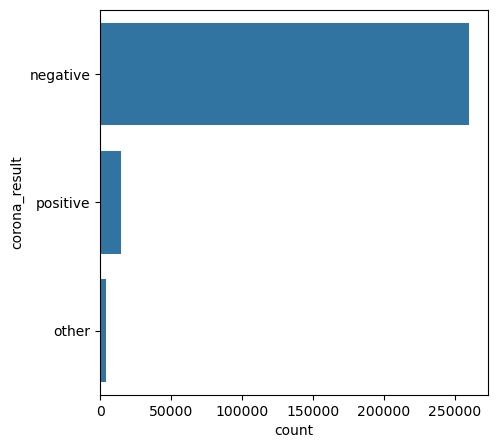

In [53]:
plt.figure(figsize=(5,5))
sns.countplot(df['corona_result'])
plt.show()

<Axes: xlabel='corona_result', ylabel='count'>

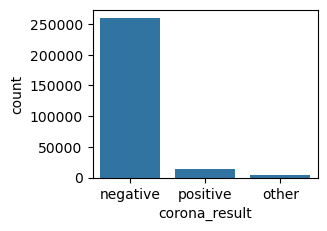

In [63]:
plt.subplot(2, 2, 1)
sns.countplot(x='corona_result', data=df)

<Axes: xlabel='age_60_and_above', ylabel='count'>

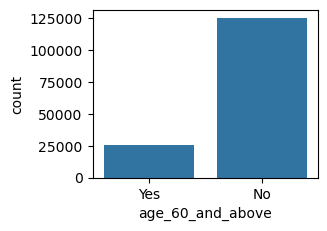

In [65]:
plt.subplot(2, 2, 2)
sns.countplot(x='age_60_and_above', data=df)

<Axes: xlabel='test_indication', ylabel='count'>

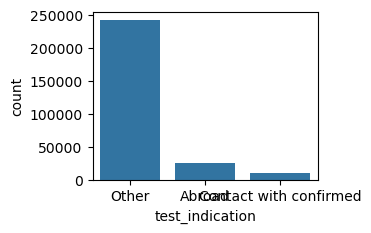

In [67]:
plt.subplot(2, 2, 3)
sns.countplot(x='test_indication', data=df)

<Axes: xlabel='gender', ylabel='count'>

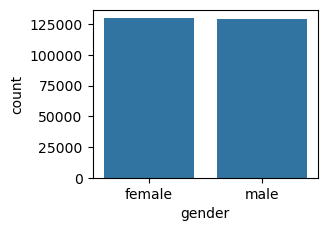

In [69]:
plt.subplot(2, 2, 4)
sns.countplot(x='gender', data=df)

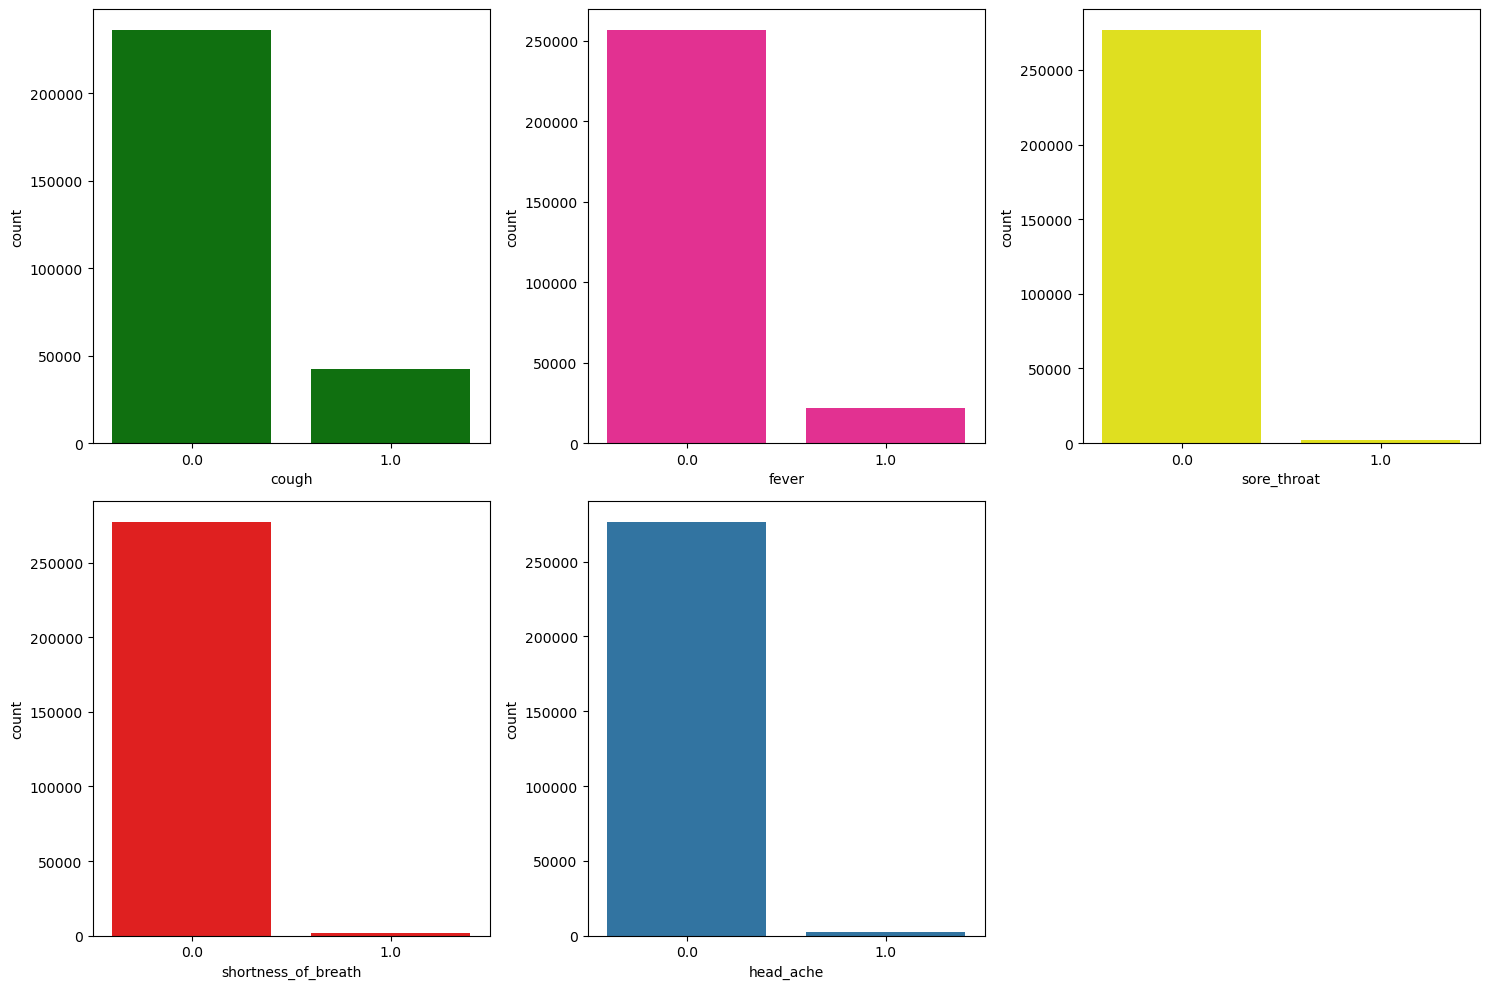

In [71]:

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='cough', data=df, color='green')
plt.subplot(2, 3, 2)
sns.countplot(x='fever', data=df, color='deeppink')

plt.subplot(2, 3, 3)
sns.countplot(x='sore_throat', data=df, color='yellow')
plt.subplot(2, 3, 4)
sns.countplot(x='shortness_of_breath', data=df, color='red')

plt.subplot(2, 3, 5)
sns.countplot(x='head_ache', data=df)

plt.tight_layout()
plt.show()

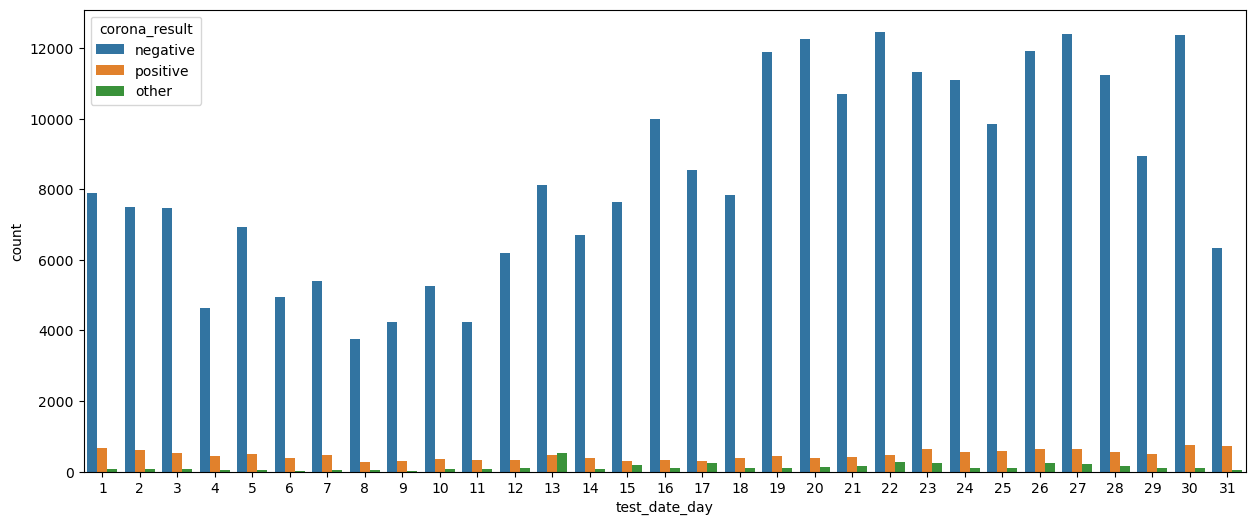

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='test_date_day', hue='corona_result')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['corona_result'])
y=df['corona_result']

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [95]:
X_train

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,test_date_month,test_date_day
72894,2020-04-20,1.0,0.0,0.0,0.0,0.0,NaN,male,Other,April,20
109499,2020-04-16,0.0,0.0,0.0,0.0,0.0,NaN,female,Other,April,16
95257,2020-04-18,0.0,0.0,0.0,0.0,0.0,NaN,male,Other,April,18
83336,2020-04-19,0.0,0.0,0.0,0.0,0.0,NaN,female,Other,April,19
82973,2020-04-19,0.0,0.0,0.0,0.0,0.0,NaN,male,Other,April,19
...,...,...,...,...,...,...,...,...,...,...,...
211543,2020-03-31,0.0,0.0,0.0,0.0,0.0,No,male,Other,March,31
86293,2020-04-19,0.0,0.0,0.0,0.0,0.0,NaN,female,Other,April,19
122579,2020-04-15,0.0,0.0,0.0,0.0,0.0,NaN,female,Other,April,15
152315,2020-04-10,0.0,0.0,0.0,0.0,0.0,No,male,Other,April,10


In [97]:
X_train['age_60_and_above_imputed'] = X_train['age_60_and_above']
X_test['age_60_and_above_imputed'] = X_test['age_60_and_above']

X_train['gender_imputed'] = X_train['gender']
X_test['gender_imputed'] = X_test['gender']

In [99]:
X_train.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,test_date_month,test_date_day,age_60_and_above_imputed,gender_imputed
38290,2020-04-24,0.0,0.0,0.0,0.0,0.0,NaN,female,Other,April,24,NaN,female
169001,2020-04-06,0.0,1.0,0.0,0.0,0.0,No,female,Contact with confirmed,April,6,No,female
272788,2020-03-18,0.0,0.0,0.0,0.0,0.0,No,NaN,Other,March,18,No,NaN
6323,2020-04-30,0.0,0.0,0.0,0.0,0.0,NaN,male,Other,April,30,NaN,male
14770,2020-04-28,0.0,0.0,0.0,0.0,0.0,NaN,female,Other,April,28,NaN,female


In [101]:
X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isnull().sum(), replace=True).values
X_test['age_60_and_above_imputed'][X_test['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_test['age_60_and_above'].isnull().sum(), replace=True).values

X_train['gender_imputed'][X_train['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_train['gender'].isnull().sum(), replace=True).values
X_test['gender_imputed'][X_test['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_test['gender'].isnull().sum(), replace=True).values

C:\Users\dsaip\AppData\Local\Temp\ipykernel_23864\762153001.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X

In [103]:
temp = pd.concat(
        [
            X_train['age_60_and_above'].value_counts() / len(X_train['age_60_and_above'].dropna()),
            X_train['age_60_and_above_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [105]:
temp

,original,imputed
No,0.829935,0.82966
Yes,0.170065,0.17034


In [107]:
temp = pd.concat(
        [
            X_train['gender'].value_counts() / len(X_train['gender'].dropna()),
            X_train['gender_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp
     

,original,imputed
female,0.50282,0.402203
male,0.49718,0.397795


In [112]:
X_train['cough_imputed'] = X_train['cough']
X_test['cough_imputed'] = X_test['cough']

X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
X_test['cough_imputed'][X_test['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_test['cough'].isnull().sum()).values

C:\Users\dsaip\AppData\Local\Temp\ipykernel_23864\3394986770.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).

In [114]:
X_train['fever_imputed'] = X_train['fever']
X_test['fever_imputed'] = X_test['fever']

X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
X_test['fever_imputed'][X_test['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_test['fever'].isnull().sum()).values
     

C:\Users\dsaip\AppData\Local\Temp\ipykernel_23864\2201233372.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).

In [122]:
X_train.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True, errors='ignore')
X_test.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True, errors='ignore')


In [124]:
X_train.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)
X_test.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)


In [128]:
X_train.drop('corona_result', axis=1, inplace=True, errors='ignore')
X_test.drop('corona_result', axis=1, inplace=True, errors='ignore')

In [130]:
X_train.isnull().mean() * 100

test_date              0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
test_indication        0.0
test_date_month        0.0
test_date_day          0.0
age_60_and_above       0.0
gender                 0.0
cough                  0.0
fever                  0.0
dtype: float64

In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [134]:
le.fit(y_train)

LabelEncoder()

In [136]:
y_train

72894     negative
109499    negative
95257     negative
83336     negative
82973     negative
            ...   
211543    negative
86293     negative
122579    negative
152315    negative
117952    negative
Name: corona_result, Length: 223077, dtype: object

In [138]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [144]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, drop='first'), ['age_60_and_above', 'gender', 'test_indication', 'test_date_month'])
], remainder='passthrough')


In [166]:
df.info

<bound method DataFrame.info of         test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
0      2020-04-30    0.0    0.0          0.0                  0.0        0.0   
1      2020-04-30    1.0    0.0          0.0                  0.0        0.0   
2      2020-04-30    0.0    1.0          0.0                  0.0        0.0   
3      2020-04-30    1.0    0.0          0.0                  0.0        0.0   
4      2020-04-30    1.0    0.0          0.0                  0.0        0.0   
...           ...    ...    ...          ...                  ...        ...   
278843 2020-03-11    0.0    0.0          0.0                  0.0        0.0   
278844 2020-03-11    0.0    0.0          0.0                  0.0        0.0   
278845 2020-03-11    0.0    0.0          0.0                  0.0        0.0   
278846 2020-03-11    0.0    0.0          0.0                  0.0        0.0   
278847 2020-03-11    0.0    0.0          0.0                  0.0        0.0   

       

In [164]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
X_train_encoded = transformer.fit_transform(X_train)

X_test_encoded = transformer.transform(X_test)

In [150]:
X_train = pd.DataFrame(X_train_encoded, columns=transformer.get_feature_names_out())

X_test = pd.DataFrame(X_test_encoded, columns=transformer.get_feature_names_out())

In [152]:
X_train.drop('remainder__test_date', axis=1, inplace=True)
X_test.drop('remainder__test_date', axis=1, inplace=True)

In [168]:
df.info


<bound method DataFrame.info of         test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
0      2020-04-30    0.0    0.0          0.0                  0.0        0.0   
1      2020-04-30    1.0    0.0          0.0                  0.0        0.0   
2      2020-04-30    0.0    1.0          0.0                  0.0        0.0   
3      2020-04-30    1.0    0.0          0.0                  0.0        0.0   
4      2020-04-30    1.0    0.0          0.0                  0.0        0.0   
...           ...    ...    ...          ...                  ...        ...   
278843 2020-03-11    0.0    0.0          0.0                  0.0        0.0   
278844 2020-03-11    0.0    0.0          0.0                  0.0        0.0   
278845 2020-03-11    0.0    0.0          0.0                  0.0        0.0   
278846 2020-03-11    0.0    0.0          0.0                  0.0        0.0   
278847 2020-03-11    0.0    0.0          0.0                  0.0        0.0   

       

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9558544020082481


In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

0.9551013089474628


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_classifier = LogisticRegression(random_state=42)

logistic_classifier.fit(X_train, y_train)

y_pred_logistic = logistic_classifier.predict(X_test)

accuracy_l = accuracy_score(y_test, y_pred_logistic)
print(accuracy_l)

0.950080688542227


C:\Users\dsaip\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [162]:
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, classification_report

conf_matrix=confusion_matrix(y_test, y_pred)

print(conf_matrix)
class_report=classification_report(y_test, y_pred)

print(class_report)

[[51580     2   480]
 [  763     0    34]
 [ 1178     5  1728]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     52062
           1       0.00      0.00      0.00       797
           2       0.77      0.59      0.67      2911

    accuracy                           0.96     55770
   macro avg       0.58      0.53      0.55     55770
weighted avg       0.94      0.96      0.95     55770

